In [60]:

using CSV
using DataFrames


dataBitcoin = CSV.read("BTC.csv", DataFrame);
dataGold =CSV.read("GOLD.csv", DataFrame);
dataSilver= CSV.read("SILVER.csv", DataFrame);
dataOil = CSV.read("OIL.csv", DataFrame);

In [202]:
dataBitcoin."Close/Last";#float estos vectores estan ordenados al reves
dataGold."Close/Last";#float
dataSilver."Close/Last";#float
dataOil."Close/Last";#float
using LinearAlgebra
N=size(dataBitcoin."Close/Last");
BTC=zeros(N[1]-7,1);#Estoy quitandole los ultimos 7 días para no considerarlos
#BTC[1,]=dataBitcoin."Close/Last"[363,];
#dataBitcoin."Close/Last"[363,];

for i in 1:N[1]-7
    
    BTC[i,]=dataBitcoin."Close/Last"[N[1]-(i-1),]
end
BTC;
X= Array((1:length(BTC))); #dias del año
Y=BTC;

In [1]:
using Plots
plot(BTC)

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1423
ERROR: LoadError: TypeError: in <:, expected Type, got Vararg
Stacktrace:
  [1] #s26#5
    @ C:\Users\super\.julia\packages\StaticArrays\l7lu2\src\util.jl:20 [inlined]
  [2] var"#s26#5"(T::Any, ::Any, #unused#::Any)
    @ StaticArrays .\none:0
  [3] (::Core.GeneratedFunctionStub)(::Any, ::Vararg{Any})
    @ Core .\boot.jl:580
  [4] macro expansion
    @ C:\Users\super\.julia\packages\StaticArrays\l7lu2\src\SArray.jl:49 [inlined]
  [5] (StaticArrays.SArray{Tuple{9}})(x::NTuple{9, ColorTypes.RGB{Float64}})
    @ StaticArrays C:\Users\super\.julia\packages\StaticArrays\l7lu2\src\SArray.jl:46
  [6] getindex(::Type{StaticArrays.SA}, ::ColorTypes.RGB{Float64}, ::ColorTypes.RGB{Float64}, ::ColorTypes.RGB{Float64}, ::ColorTypes.RGB{Float64}, ::Vararg{ColorTypes.RGB{Float64}})
    @ StaticArrays C:\Users\super\.julia\packages\StaticArrays\l7lu2\src\initializers.jl:31
  [7] top-level scope
    @ C:\Users\s

LoadError: Failed to precompile Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80] to C:\Users\super\.julia\compiled\v1.7\Plots\jl_9140.tmp.

In [296]:
epochs = 0

0

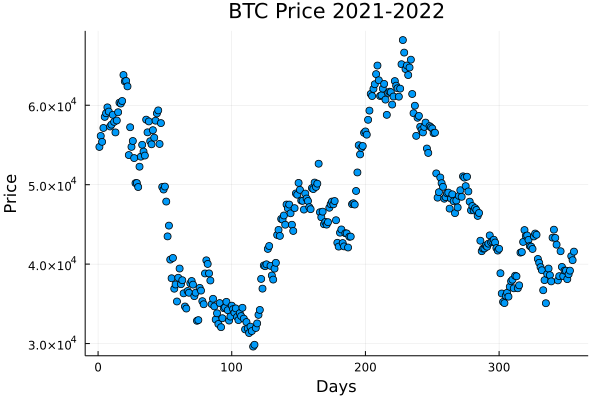

In [203]:
scatter(X,Y, leg=false, xlabel= "Days", ylabel="Price", title="BTC Price 2021-2022")




In [297]:
# initialize parameters

θ₁ = 0.0     # slope
θ₂ = 0.0
θ₃  = 0.0
θ₄  = 0.0
θ₅  = 0.0
b= ones(N[1]-7,1)
y_hat=Array((1:N[1]-7))
for i in 1:N[1]-7
    h(x,y)= θ₁*x[i]^2 + θ₂*y[i]^2 + θ₃*x[i]*y[i] + θ₄*x[i] + θ₅*y[i]
        y_hat[i,1]=h(X,Y)
end
y_hat;

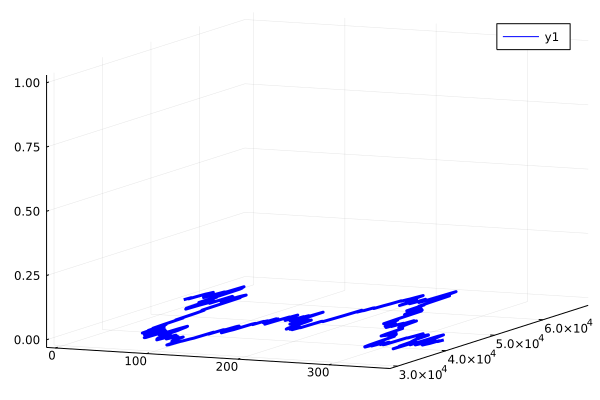

In [271]:
plot(X, Y, y_hat, color = :blue, linewidth = 3)

In [298]:
m = length(X)

#y_hat = h(X,Y)

function cost(X,Y)
    (1 / (2 * m)) * sum((y_hat - b).^2)
end

J = cost(X, Y)


0.5

In [299]:
J_history = []

push!(J_history, J)

1-element Vector{Any}:
 0.5

In [300]:
function pd_theta_1(X, Y)
    (1 / m) * sum((y_hat - b) .* X.^2)   
end

function pd_theta_2(X, Y)
    (1 / m) * sum((y_hat - b) .*Y.^2)
end
function pd_theta_3(X, Y)
    (1 / m) * sum((y_hat - b) .* X.*Y)
end
function pd_theta_4(X,Y)
    (1 / m) * sum((y_hat - b) .* X)
end
function pd_theta_5(X,Y)
    (1 / m) * sum((y_hat - b) .* Y)
end


pd_theta_5 (generic function with 1 method)

In [301]:
α₁ = 0.001
α₂ = 0.002
α₃ = 0.003
α₄ = 0.004
α₅ = 0.005

0.005

In [352]:
# calculate partial derivatives
while norm2(y_hat-b)>1000

    theta_1_temp = pd_theta_1(X, Y)
theta_2_temp = pd_theta_2(X, Y)
theta_3_temp = pd_theta_3(X, Y)
theta_4_temp = pd_theta_4(X, Y)
theta_5_temp = pd_theta_5(X, Y)
theta_1_temp
    # adjust parameters by the learning rate

θ₁ -= α₁ * theta_1_temp
θ₂ -= α₂ * theta_2_temp
θ₃ -= α₃ * theta_3_temp
θ₄ -= α₄ * theta_4_temp
θ₅ -= α₅ * theta_5_temp
for i in 1:N[1]-7
    y_hat[i,1]=h(X,Y)
end
J = cost(X, Y)

push!(J_history, J)


# replot prediction

epochs += 1

plot!(X, Y, y_hat, color = :blue, alpha = 0.5,
    title = "BTC Price 2021-2022 epochs=$epochs",
    xlabel= "Days",
    ylabel= "Price"
)

end 
################################################################################
# end iterations
################################################################################


LoadError: InexactError: Int64(-2.7541736277594835e33)

In [12]:
using Pkg
Pkg.add("NLPModels")
Pkg.add("NLPModelsJuMP")
Pkg.add("JuMP")
Pkg.add("JSOSolvers")
Pkg.add("CaNNOLeS")
Pkg.status


#paquetes para optmización

    


   Resolving package versions...
  No Changes to `C:\Users\super\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\super\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\super\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\super\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\super\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\super\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\super\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\super\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
    Updating `C:\Users\super\.julia\environments\v1.7\Project.toml`
  [5a1c9e79] + CaNNOLeS v0.5.3
    Updating `C:\Users\super\.julia\environments\v1.7\Manifest.toml`
  [b99e7846] + BinaryProvider v0.5.10
  [5a1c9e79] + CaNNOLeS v0.5.3
  [34c5aeac] + HSL v0.2.2


In [138]:
using JSOSolvers

  lafuncion logistca ahora exponencial diferente: buscamos   $ y_i \approx \frac{1}{1+e^{- \beta_0 - \beta_1 x_1}}$
  

In [524]:
β=Array(zeros(3,1));
Lny= log.(Y)
scatter(X,Lny, leg=false);






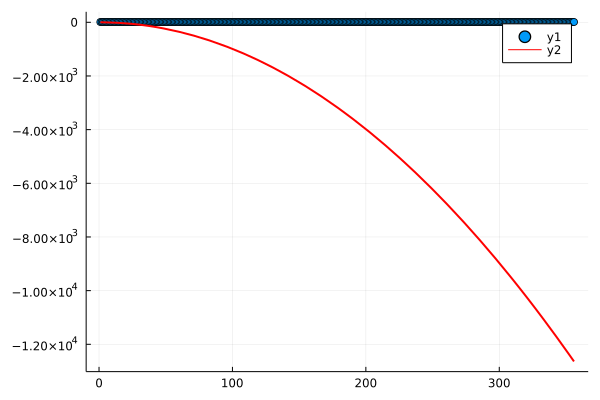

In [385]:
#h(β,x)=1 / (1+exp(-β[1]-β[2]*x))

h(β,x)=β[1] .+ β[2].*x .- β[3].*x.^2
scatter(X,Lny, leg=true)
plot!(X-> h([0.1,0.1,0.1],X), extrema(X)..., lw=2, c=:red)

In [526]:
using NLPModels
using JuMP
using NLPModelsJuMP
model = Model()
@variable(model,β[1:3])
#@NLexpression(model, res[i=1:N[1]-7], 1 / (1+exp(-β[1]-β[2]*x[i]))-y[i]) 
@NLexpression(model, res[i=1:N[1]-7], β[1] + β[2]*x[i] - β[3]*x[i]^2 - Lny[i])
#nls = MathOptNLSModel(model, res, name="logistic")
nls = MathOptNLSModel(model, res, name="distri Euler BTC  ");

"Execution stats: first-order stationary"

In [527]:
output=trunk(nls)
print(output)

Generic Execution stats
  status: first-order stationary
  objective value: 7.064603743488147
  primal feasibility: 0.0
  dual feasibility: 4.214987320743889e-5
  solution: [10.724393671905359  0.00031908208941740235  1.1972327913412528e-6]
  iterations: 3
  elapsed time: 0.0019998550415039062


In [574]:
βC=output.solution
scatter(X,Lny, leg=true)
plot!(X-> h(βC,X), extrema(X)..., lw=2, c=:red);
βC;

3-element Vector{Float64}:
 10.724393671905359
  0.00031908208941740235
  1.1972327913412528e-6

In [575]:
βC

3-element Vector{Float64}:
 10.724393671905359
  0.00031908208941740235
  1.1972327913412528e-6

testin the model for the next seven days

In [465]:
BTCyear=zeros(N[1],1);
for i in 1:N[1]
    
    BTCyear[i,]=dataBitcoin."Close/Last"[N[1]-(i-1),]
end
BTCyear;
Xyear= Array((1:length(BTCyear))); #dias del año
BTCyear;
LnBTCyear= log.(BTCyear);

In [522]:
#Probar el modelo




In [517]:
####intento con una elipse######
a=Array(zeros(5,1));
E(a,x,y)= a[1].*x.^2 .+ a[2].*y.^2 .+ a[3].*x.*y .+ a[4].*x .+ a[5].*y
scatter(X,Y, leg=false);
E([0.1,0.1,0.1,0.1,0.1],X,Y);
unos=50000*ones(N[1]-7,);


In [518]:

modelE = Model()
@variable(modelE,a[1:5])
#@NLexpression(model, res[i=1:N[1]-7], 1 / (1+exp(-a[1]-a[2]*x[i]))-y[i]) 
@NLexpression(modelE, resE[i=1:N[1]-7], a[1]*x[i]^2 + a[2]*y[i]^2 + a[3]*x[i]*y[i] + a[4]*x[i] + a[5]*y[i] - unos[i])
nlsE = MathOptNLSModel(modelE, resE, name="distri Euler elipse  ");
 

In [519]:
outputE =trunk(nlsE)
print(outputE)

Generic Execution stats
  status: first-order stationary
  objective value: 6.033053631524048e8
  primal feasibility: 0.0
  dual feasibility: 5.665677166208218e6
  solution: [-0.010973505330720109  -2.2045739084956034e-5  2.752101202332458e-5  0.006553466467726897  2.144780332294651]
  iterations: 3
  elapsed time: 0.003000020980834961


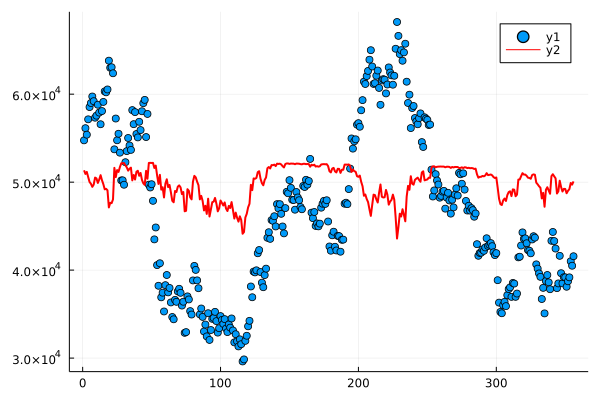

In [520]:
a=outputE.solution
scatter(X,Y)
plot!(X, E(a,X,Y), lw=2, c=:red)



In [521]:
err=norm2(E(a,X,Y)-unos)

34736.3027149524

In [404]:
#############################################################################
######################## 333333333##############################


In [543]:
#tamaños de data

G=size(dataGold)[1]; #y sera el tamaño de las 3 muestras
GY=zeros(G,1);
OY=zeros(G,1);
DY=zeros(G,1);#Los vectores donde guardar      precios


for i in 1:G
    
GY[i]=dataGold."Close/Last"[G-(i-1),]
OY[i]=dataOil."Close/Last"[G-(i-1),]
DY[i]=dataSilver."Close/Last"[G-(i-1),]
end
X2 =Array(1 : length(GY));
#tomando logaritmo

LnG=log.(GY);
LnO=log.(OY);
LnD=log.(DY);

scatter( X2, LnG,
   
    
    leg=false);
plot!(X2-> h([0.1,0.1,0.1],X2), extrema(X2)..., lw=2, c=:red);



In [529]:
#####aplicado al data set de Gold
modelG = Model()
@variable(modelG,β[1:3])
#@NLexpression(model, res[i=1:N[1]-7], 1 / (1+exp(-β[1]-β[2]*x[i]))-y[i]) 
@NLexpression(modelG, resG[i=1:G], β[1] + β[2]*x[i] - β[3]*x[i]^2 - LnG[i])
#nls = MathOptNLSModel(model, res, name="logistic")
nlsG = MathOptNLSModel(modelG, resG, name="distri Euler Gold  ");

In [534]:
outputG =trunk(nlsG)
print(outputG)

Generic Execution stats
  status: first-order stationary
  objective value: 0.08668986288122565
  primal feasibility: 0.0
  dual feasibility: 1.2430262988631217e-8
  solution: [7.508172895393324  -0.00046794271990308674  -2.6009081975832037e-6]
  iterations: 5
  elapsed time: 0.003000020980834961


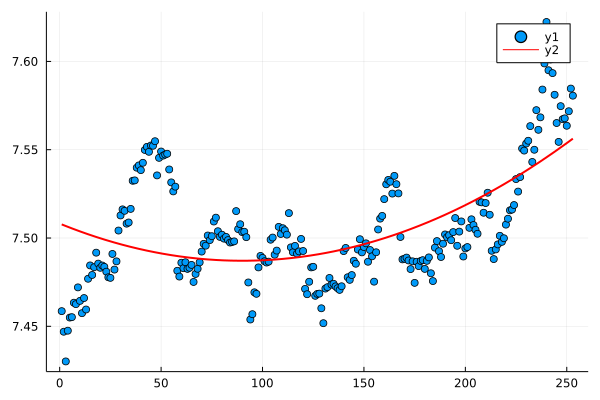

In [536]:
βG=outputG.solution
scatter(X2,LnG, leg=true)
plot!(X2-> h(βG,X2), extrema(X2)..., lw=2, c=:red)

In [537]:
####### Oil#######
#####aplicado al data set de Oil
modelO = Model()
@variable(modelO,β[1:3])
#@NLexpression(model, res[i=1:N[1]-7], 1 / (1+exp(-β[1]-β[2]*x[i]))-y[i]) 
@NLexpression(modelO, resO[i=1:G], β[1] + β[2]*x[i] - β[3]*x[i]^2 - LnO[i])
#nls = MathOptNLSModel(model, res, name="logistic")
nlsO = MathOptNLSModel(modelO, resO, name="distri Euler Oil  ");

In [449]:
outputO=trunk(nlsO);
print(outputO)

Generic Execution stats
  status: first-order stationary
  objective value: 0.5674363085145226
  primal feasibility: 0.0
  dual feasibility: 7.265092107049679e-6
  solution: [2.9418708802051796  0.0003627024076627086  -6.305979385539534e-6]
  iterations: 3
  elapsed time: 0.002000093460083008


In [538]:
βO=outputO.solution
scatter(X2,LnO, leg=true)
plot!(X2-> h(βO,X2), extrema(X2)..., lw=2, c=:red);


In [539]:
####### Oil#######
#####aplicado al data set de Oil
modelD = Model()
@variable(modelD,β[1:3])
#@NLexpression(model, res[i=1:N[1]-7], 1 / (1+exp(-β[1]-β[2]*x[i]))-y[i]) 
@NLexpression(modelD, resD[i=1:G], β[1] + β[2]*x[i] - β[3]*x[i]^2 - LnD[i])
#nls = MathOptNLSModel(model, res, name="logistic")
nlsD= MathOptNLSModel(modelD, resD, name="distri Euler Silver  ");

In [540]:
outputD=trunk(nlsD);
print(outputD)

Generic Execution stats
  status: first-order stationary
  objective value: 0.3152816281404888
  primal feasibility: 0.0
  dual feasibility: 3.531803479030542e-5
  solution: [3.3307230944775013  -0.0019661470797866162  -5.641523732066934e-6]
  iterations: 3
  elapsed time: 0.003000020980834961


In [542]:
βD=outputD.solution
scatter(X2,LnD, leg=true)
plot!(X2-> h(βD,X2), extrema(X2)..., lw=2, c=:red);

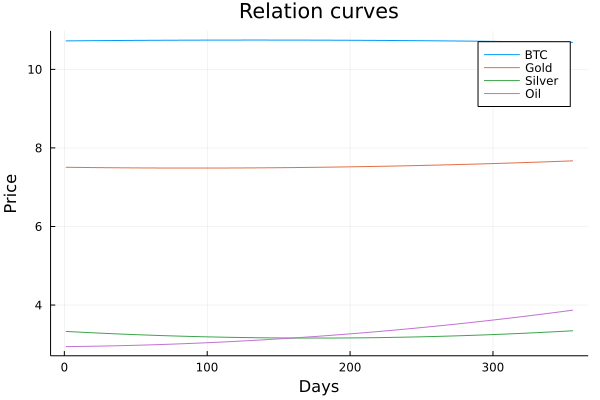

In [585]:
plot(X ,[h(βC,X),h(βG,X), h(βD,X), h(βO,X)],
    
    label = ["BTC" "Gold" "Silver" "Oil"],
    title = "Relation curves",
    xlabel= "Days",
    ylabel= "Price"
)
